<a href="https://colab.research.google.com/github/TsendBayartsengel/Bayartsengel/blob/main/variant_8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
from scipy.linalg import solve
from numpy.linalg import cond

def generate_lower_triangular_matrix(n):
    return np.tril(np.random.randn(n, n) * 1e-6, -2) + np.eye(n)

def generate_upper_triangular_matrix(n):
    return np.triu(np.random.randn(n, n) * 1e-6, 2) + np.eye(n)

def generate_matrix(n):
    L = generate_lower_triangular_matrix(n)
    U = generate_upper_triangular_matrix(n)
    return np.dot(L, U)

def calculate_condition_number(A):
    return np.linalg.cond(A)

def test_solve_and_cond(n_min, n_max):
    for n in range(n_min, n_max):
        A = generate_matrix(n)
        cond_number = calculate_condition_number(A)
        if cond_number <= 1e16:
            x = np.random.randn(n)
            b = np.dot(A, x)
            x_solve = solve(A, b)
            assert np.allclose(x, x_solve)

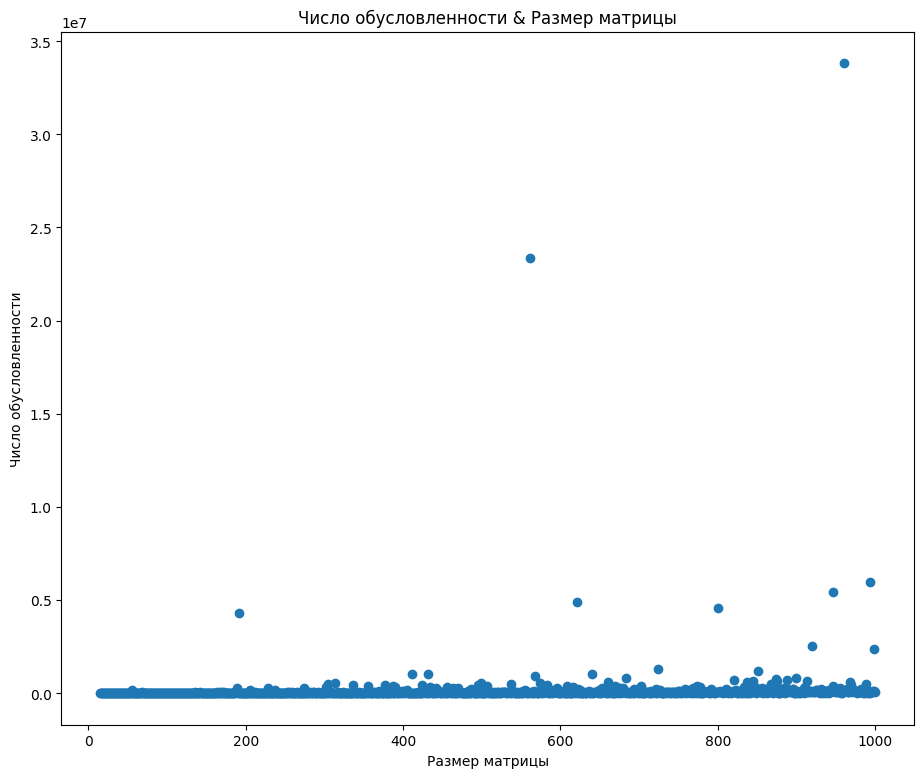

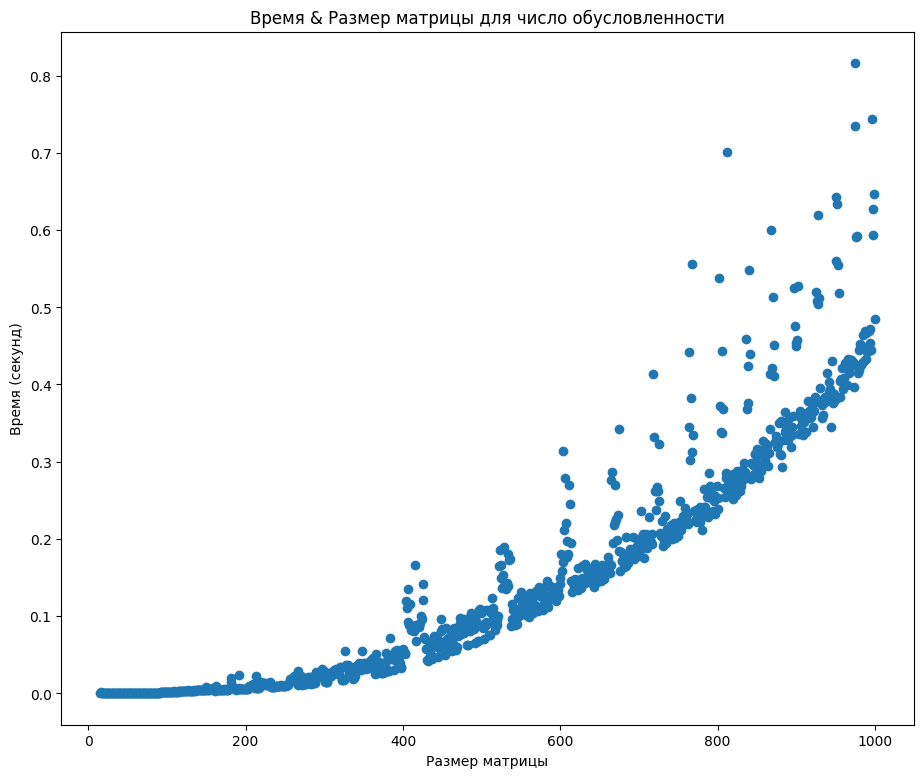

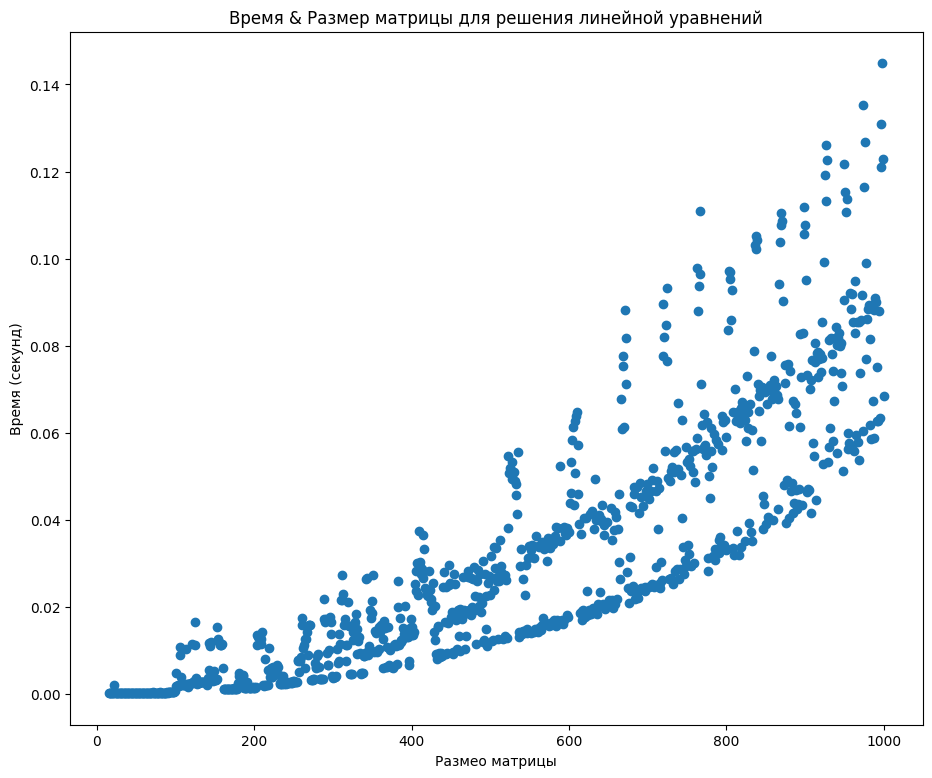

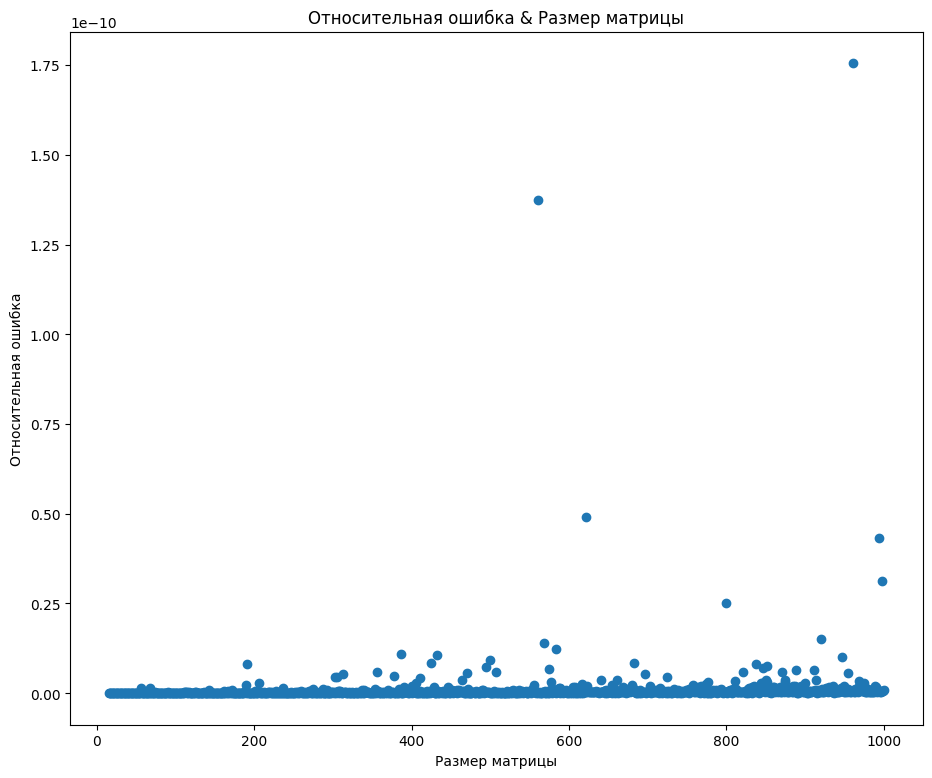

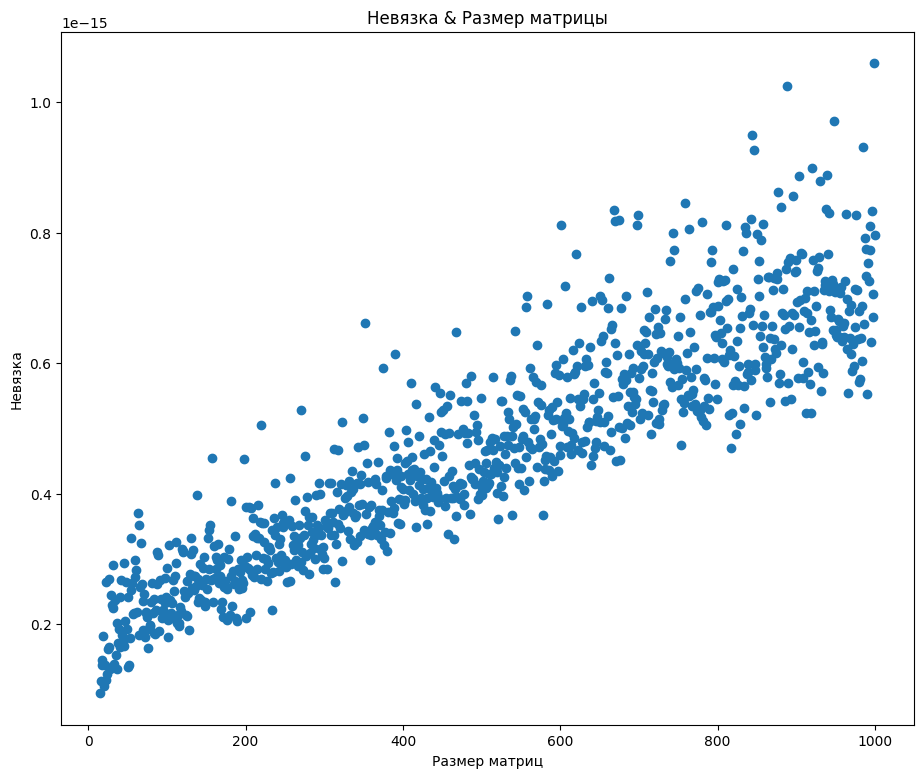

In [ ]:
import numpy as np
from numpy.linalg import cond
from scipy.linalg import lu_factor, lu_solve, solve
import time
import matplotlib.pyplot as plt

n_min = 15
n_max = 1000
cond_max = 1e16

cond_values = []
cond_times = []
solve_times = []
rel_errors = []
residuals = []

for n in range(n_min, n_max+1):
    A = np.random.rand(n, n)
    x = np.random.rand(n)
    b = np.dot(A, x)
    
    start_time = time.time()
    c = cond(A)
    end_time = time.time()
    cond_times.append(end_time - start_time)
    cond_values.append(c)
    
    start_time = time.time()
    x_solve = solve(A, b)
    end_time = time.time()
    solve_times.append(end_time - start_time)
    
    rel_error = np.linalg.norm(x - x_solve) / np.linalg.norm(x)
    rel_errors.append(rel_error)
    
    residual = np.linalg.norm(np.dot(A, x_solve) - b) / np.linalg.norm(b)
    residuals.append(residual)

plt.figure(figsize=(11, 9))
plt.scatter(range(n_min, n_max+1), cond_values)
plt.xlabel("Размер матрицы")
plt.ylabel("Число обусловленности")
plt.title("Число обусловленности & Размер матрицы")
plt.show()

plt.figure(figsize=(11, 9))
plt.scatter(range(n_min, n_max+1), cond_times)
plt.xlabel("Размер матрицы")
plt.ylabel("Время (секунд)")
plt.title("Время & Размер матрицы для число обусловленности")
plt.show()

plt.figure(figsize=(11, 9))
plt.scatter(range(n_min, n_max+1), solve_times)
plt.xlabel("Размео матрицы")
plt.ylabel("Время (секунд)")
plt.title("Время & Размер матрицы для решения линейной уравнений")
plt.show()

plt.figure(figsize=(11, 9))
plt.scatter(range(n_min, n_max+1), rel_errors)
plt.xlabel("Размер матрицы")
plt.ylabel("Относительная ошибка")
plt.title("Относительная ошибка & Размер матрицы")
plt.show()

plt.figure(figsize=(11, 9))
plt.scatter(range(n_min, n_max+1), residuals)
plt.xlabel("Размер матриц")
plt.ylabel("Невязка")
plt.title("Невязка & Размер матрицы")
plt.show()
